In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Evaluating CLustering with Ground Truth

#### Metrics:

* **adjusted rand index** (ARI) [0;1]
* **normalized mutual information** (NMI) [0;1]

Compare Random Assignemtn, KMeans, Agglomerative and DBSCAN clustering algorithms on Two Moon dataset.

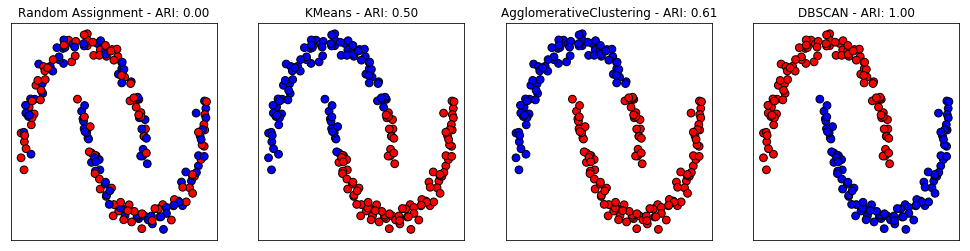

In [5]:
X, y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
X_scaled = StandardScaler().fit_transform(X) # scale data

fig, axes = plt.subplots(1, 4, figsize=(17,4),
                        subplot_kw={'xticks':(), 'yticks':()})

rb = ListedColormap(['#FF0000', '#0000FF'])

# random cluster assignment
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# other algorithms
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, 
               s=60, edgecolor='black', cmap=rb)
axes[0].set_title('Random Assignment - ARI: {:.2f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    y_pred = algorithm.fit_predict(X_scaled)
    
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred, 
               s=60, edgecolor='black', cmap=rb)
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, y_pred)))
plt.show()

* DBSCAN scored perfectly while clustering randomly/by chance scores 0
* It would be a mistake to evaluate clustering with accuracy score since the algorithms predict label values randomly.
* In real world it is almost impossible to evaluate clustering since there are no given labels. If there were it woul not be a unsupervised learning but supervised instead.
* The only way to know whether the clustering corresponds to anything we are interested in is to analyze the clusters **MANUALLY**.

# Summary

* evaluating clustering is a highly qualitative procedure
* often most helpful in the exploratory phase of data analysis
* 